In [20]:
import numpy as np
import random
import sklearn
from sklearn.datasets.samples_generator import make_regression
import pylab
from scipy import stats

In [21]:
def gradient_descent(alpha,x,y,ep=0.0001,max_iter=10000):
    converged=False
    iter=0
    m=x.shape[0]
    t0=np.random.random(x.shape[1])
    t1=np.random.random(x.shape[1])
    J = sum([(t0 + t1*x[i] - y[i])**2 for i in range(m)])
    while not converged:
        grad0 = 1.0/m * sum([(t0 + t1*x[i] - y[i]) for i in range(m)])
        grad1 = 1.0/m * sum([(t0 + t1*x[i] - y[i])*x[i] for i in range(m)])
        temp0 = t0 - alpha * grad0
        temp1 = t1 - alpha * grad1
        t0 = temp0
        t1 = temp1
        e = sum( [ (t0 + t1*x[i] - y[i])**2 for i in range(m)] ) 

        if abs(J-e) <= ep:
            print('Converged, iterations: ', iter, '!!!')
            converged = True
    
        J = e   # update error 
        iter += 1  # update iter
    
        if iter == max_iter:
            print ('Max interactions exceeded!')
            converged = True

    return t0,t1

x.shape = (100, 1) y.shape = (100,)
Converged, iterations:  642 !!!
theta0 = [-2.81883516] theta1 = [ 43.13903586]
intercept = -2.8496363946075394 slope = 43.204243880239375


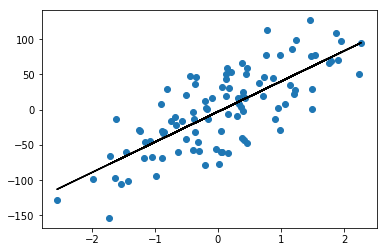

Done!


In [22]:
if __name__ == '__main__':

    x, y = make_regression(n_samples=100, n_features=1, n_informative=1, 
                        random_state=0, noise=35) 
    print ('x.shape = %s y.shape = %s' %(x.shape, y.shape))
 
    alpha = 0.01 # learning rate
    ep = 0.01 # convergence criteria

    # call gredient decent, and get intercept(=theta0) and slope(=theta1)
    theta0, theta1 = gradient_descent(alpha, x, y, ep, max_iter=1000)
    print ('theta0 = {} theta1 = {}'.format(theta0,theta1))

    # check with scipy linear regression 
    slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x[:,0], y)
    print ('intercept = {} slope = {}'.format(intercept,slope)) 

    # plot
    for i in range(x.shape[0]):
         y_predict = theta0 + theta1*x 

    pylab.plot(x,y,'o')
    pylab.plot(x,y_predict,'k-')
    pylab.show()
    print ("Done!")